In [63]:
import numpy as np
import h5py
from matplotlib import pyplot as plt
import pandas as pd
import pyhdf
import glob

In [60]:
ls ../data/**/*.h5

../data/test_data/GC1SG1_20200516D08D_T0727_L2SG_LAI_Q_1000.h5


In [62]:
ls ../data/h27v07/*.hdf -la

-rw-r--r-- 1 afukuchi docker 9844205  5月 31 14:17 ../data/h27v07/MCD15A3H.A2019273.h27v07.006.2019282172300.hdf
-rw-r--r-- 1 afukuchi docker 8138955  5月 31 14:28 ../data/h27v07/MCD15A3H.A2020033.h27v07.006.2020038232740.hdf


In [4]:
with h5py.File('../data/test_data/GC1SG1_20200516D08D_T0727_L2SG_LAI_Q_1000.h5','r') as f:
    print(f.keys())    
    lst=f['Image_data/LAI_AVE']

    desc=lst.attrs['Data_description']
    errdn=lst.attrs['Error_DN']
    maxdn=lst.attrs['Maximum_valid_DN']
    mindn=lst.attrs['Minimum_valid_DN']
    slope=lst.attrs['Slope']
    offset=lst.attrs['Offset']
    unit=lst.attrs['Unit']
    ar = np.array(lst)
    valid = np.where( ar==errdn , -1, ar )
    value = valid*slope + offset
    print(value)


<KeysViewHDF5 ['Geometry_data', 'Global_attributes', 'Image_data', 'Processing_attributes']>
[[ 1.05300005e+00  1.09700005e+00  1.03800005e+00 ... -1.00000005e-03
  -1.00000005e-03 -1.00000005e-03]
 [ 9.61000046e-01  1.13000005e+00  1.28500006e+00 ... -1.00000005e-03
  -1.00000005e-03 -1.00000005e-03]
 [ 1.19400006e+00  1.00700005e+00  9.14000043e-01 ... -1.00000005e-03
  -1.00000005e-03 -1.00000005e-03]
 ...
 [-1.00000005e-03 -1.00000005e-03 -1.00000005e-03 ... -1.00000005e-03
  -1.00000005e-03 -1.00000005e-03]
 [-1.00000005e-03 -1.00000005e-03 -1.00000005e-03 ... -1.00000005e-03
  -1.00000005e-03 -1.00000005e-03]
 [-1.00000005e-03 -1.00000005e-03 -1.00000005e-03 ... -1.00000005e-03
  -1.00000005e-03 -1.00000005e-03]]


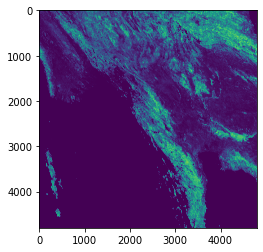

In [5]:
plt.imshow(value)
plt.show()

In [16]:
from pyhdf.SD import SD, SDC

In [57]:
FILE_NAME ="../data/test_data/MCD15A2H.A2020137.h27v06.006.2020148021544.hdf"

hdf = SD(FILE_NAME, SDC.READ)

print(hdf.datasets())

print(type(hdf.select("Lai_500m")))
x=hdf.select("LaiStdDev_500m")[:]
print(hdf.select('Fpar_500m')[:])

{'Fpar_500m': (('YDim:MOD_Grid_MOD15A2H', 'XDim:MOD_Grid_MOD15A2H'), (2400, 2400), 21, 0), 'Lai_500m': (('YDim:MOD_Grid_MOD15A2H', 'XDim:MOD_Grid_MOD15A2H'), (2400, 2400), 21, 1), 'FparLai_QC': (('YDim:MOD_Grid_MOD15A2H', 'XDim:MOD_Grid_MOD15A2H'), (2400, 2400), 21, 2), 'FparExtra_QC': (('YDim:MOD_Grid_MOD15A2H', 'XDim:MOD_Grid_MOD15A2H'), (2400, 2400), 21, 3), 'FparStdDev_500m': (('YDim:MOD_Grid_MOD15A2H', 'XDim:MOD_Grid_MOD15A2H'), (2400, 2400), 21, 4), 'LaiStdDev_500m': (('YDim:MOD_Grid_MOD15A2H', 'XDim:MOD_Grid_MOD15A2H'), (2400, 2400), 21, 5)}
<class 'pyhdf.SD.SDS'>
[[ 41  41  41 ...  57  68  84]
 [ 37  41  41 ...  38  38  61]
 [ 37  42  42 ...  43  60  57]
 ...
 [ 41  37  39 ... 254 254 254]
 [ 35  35  39 ... 254 254 254]
 [ 36  35  38 ... 254 254 254]]


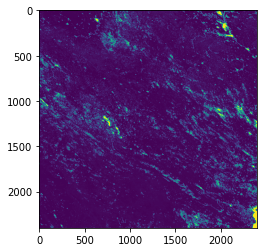

In [58]:
plt.imshow(x)

In [7]:
df = pd.read_hdf("../data/test_data/MCD15A2H.A2020137.h27v06.006.2020148021544.hdf")

OSError: HDF5 error back trace

  File "H5F.c", line 509, in H5Fopen
    unable to open file
  File "H5Fint.c", line 1400, in H5F__open
    unable to open file
  File "H5Fint.c", line 1700, in H5F_open
    unable to read superblock
  File "H5Fsuper.c", line 411, in H5F__super_read
    file signature not found

End of HDF5 error back trace

Unable to open/create file '../data/test_data/MCD15A2H.A2020137.h27v06.006.2020148021544.hdf'

In [7]:
df

NameError: name 'df' is not defined